In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, preprocessing, neighbors
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= (8,6)


**Importing the dataset**

In [9]:
df = pd.read_csv('Social_Network_Ads.csv')

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df['Gender'] = df.Gender.map({'Male':0, 'Female':1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
X,y = df.drop(columns=['User ID','Purchased']), df['Purchased']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=27, train_size=0.8, shuffle=True)

X_train.shape, X_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [13]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [14]:
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)

y_pred = knn.predict(X_test)

**Predicting the Test set results**

In [15]:
print("Train score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test score: {:.2f}".format(knn.score(X_test, y_test)))

Train score: 0.92
Test score: 0.90


In [16]:
metrics.accuracy_score(y_test, y_pred)

0.9

this model is good model,

it has balence data


**Making the Confusion Matrix**

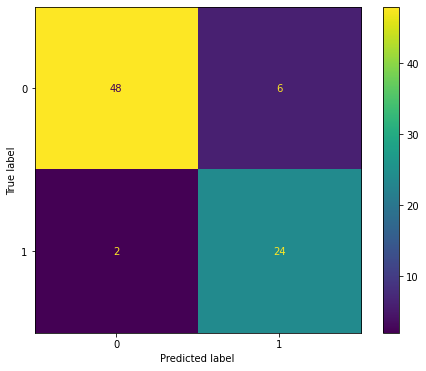

In [17]:
metrics.plot_confusion_matrix(knn, X_test, y_test);

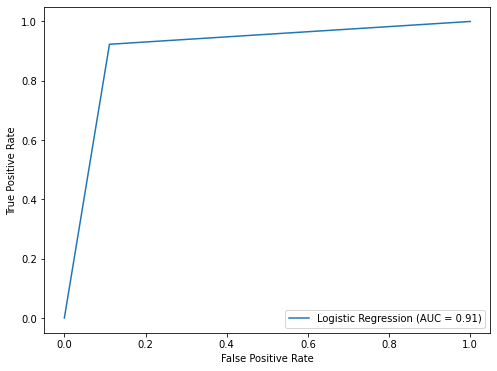

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot();